In [1]:

#Submission for Jamaica Code Fest Competition
#Date : September 30,2021
#Group: Blazing Baileys
#Group Leader:Shayd Bailey, Morgan-Lee Bailey, Blayz Bailey

#Description : This program is about a show recommender which can recommend


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_anime.csv')
#df['time'] = pd.to_datetime(df['ts'],unit='ms')
#df.set_index('time', inplace = True)
#df.drop(columns=['ts'], inplace=True)

In [2]:
df.tail(5)

,uid,title,synopsis,genre,aired,episodes,members,popularity,score,img_url,link
18600,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
18601,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
18602,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
18603,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...
18604,87,Mobile Suit Gundam: Char's Counterattack,The year is Universal Century 0093. Char Aznab...,"['Military', 'Sci-Fi', 'Space', 'Drama', 'Mecha']","Mar 12, 1988",1.0,29248,2604,7.73,https://cdn.myanimelist.net/images/anime/1523/...,https://myanimelist.net/anime/87/Mobile_Suit_G...


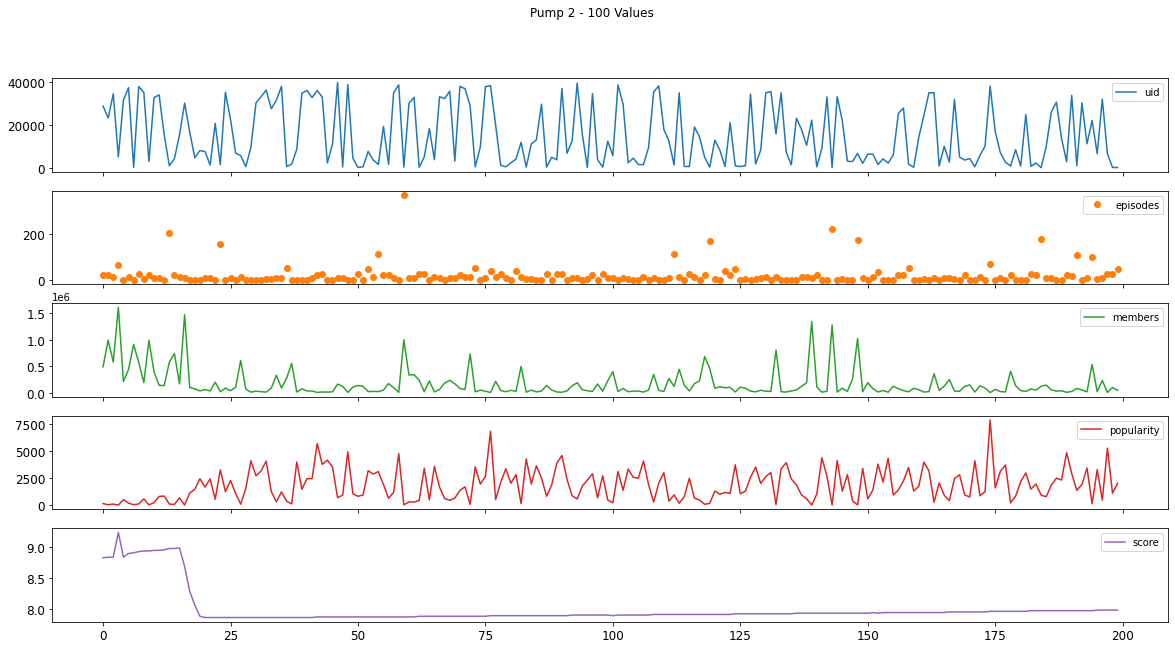

In [3]:
df21 = df.head(200)
df21.plot(figsize=(20,10), fontsize=12,subplots=True, style=["-","o"], title = "Pump 2 - 100 Values")
plt.show()

In [4]:
#Get list with column names:F1, F2, Fn, L
def get_columns(n):
    f = []
    for x in range(1,n+1):
        f.append("F"+str(x))
    f.append("L")
    return f

# Create empty data frame
def create_empty_df(n):
    d= ([0.]*n)
    d.append(0)
    dfx = pd.DataFrame([d], columns=get_columns(n))
    dfx.drop(dfx.index[0], inplace=True)
    return dfx

#Create data frame with one row
def create_df(vals: list, label:int = 0):
    if not inistance(vals, list):
        raise TypeError
    #vals.append(label)
    dfx = pd.DataFrame([vals+[label]], columns=get_columns(len(vals)))
    return dfx

In [5]:
print(f"The dataset contains {df.shape[0]} anime shows")

The dataset contains 18605 anime shows


In [6]:
#summary statistics
sum_stats = df[["episodes", "members", "popularity", "score"]].describe()
mode = df[["episodes", "members", "popularity", "score"]].mode()
sum_stats = sum_stats.append(mode)
sum_stats.rename(index={0: "mode"})

,episodes,members,popularity,score
count,18605.000000,1.860500e+04,18605.000000,18605.000000
mean,11.460414,3.561403e+04,7669.335609,6.440850
std,47.950386,1.136400e+05,4687.455400,1.000620
min,1.000000,2.500000e+01,1.000000,1.900000
25%,1.000000,3.880000e+02,3639.000000,5.780000
50%,2.000000,2.465000e+03,7458.000000,6.420000
75%,12.000000,1.526800e+04,11591.000000,7.150000
max,3057.000000,1.871043e+06,16336.000000,9.230000
mode,1.000000,9.600000e+01,1228.000000,6.436107
1,NaN,NaN,2842.000000,NaN


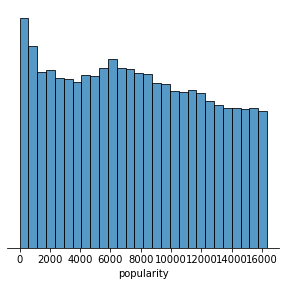

In [7]:
#sns.pairplot(data = df, vars=["popularity"], height=4, corner=True);

sns.pairplot(data = df, vars=[ "popularity"], height=4, corner=True);

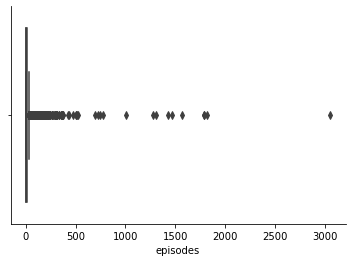

In [8]:
#boxplot of number of episodes
sns.boxplot(data=df, x="episodes")
sns.despine();

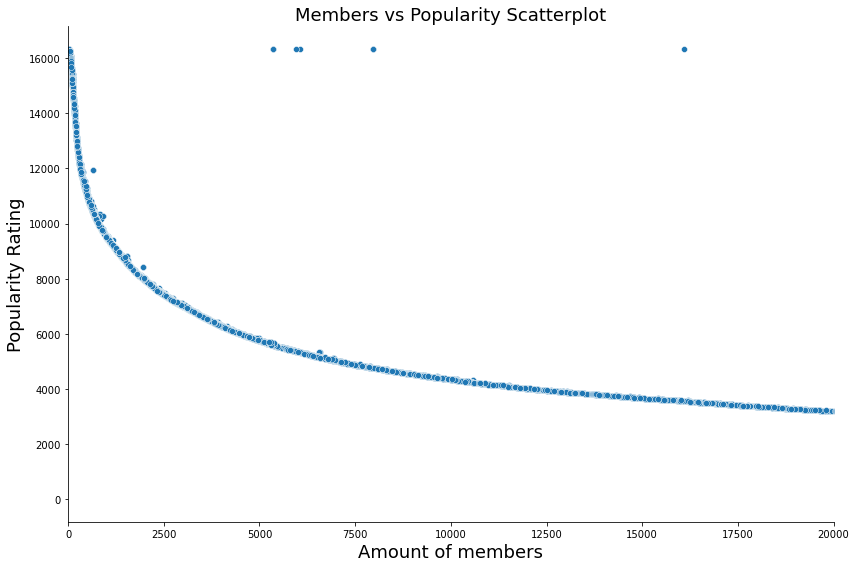

In [9]:
#plot ratings vs members
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="members", y="popularity")
plt.title("Members vs Popularity Scatterplot", size=18)
plt.xlabel("Amount of members", size=18)
plt.xlim(0, 20000)
plt.ylabel("Popularity Rating", size=18)
sns.despine()
plt.tight_layout();

In [10]:
# function to count the freq of animes for each genre
def count_genre_freq(df, column, delimiter=", "):
    from collections import Counter
    non_empty_rows = df[df[column].isnull() == False][column]
    row_counted = non_empty_rows.str.split(delimiter).apply(Counter)
    total_freq = dict(sum(row_counted, Counter()))
    freq_series = pd.Series(total_freq)
    output = freq_series.sort_values(ascending=False)
    return output

In [11]:
# Find total number of animes in the dataset that belong to a certain genre
animes_per_genre = count_genre_freq(df, "genre")
animes_per_genre

['Action'           3993
['Comedy'           2603
'Comedy'            2525
'Shounen']          1770
['Hentai']          1767
                    ... 
['Thriller']           1
['Vampire']            1
['Martial Arts']       1
'Yaoi'                 1
['Police']             1
Length: 162, dtype: int64

In [12]:
# top 5 most frequent genres
animes_per_genre.head()

['Action'     3993
['Comedy'     2603
'Comedy'      2525
'Shounen']    1770
['Hentai']    1767
dtype: int64

In [13]:
# 5 least frequent genres
animes_per_genre.tail()

['Thriller']        1
['Vampire']         1
['Martial Arts']    1
'Yaoi'              1
['Police']          1
dtype: int64

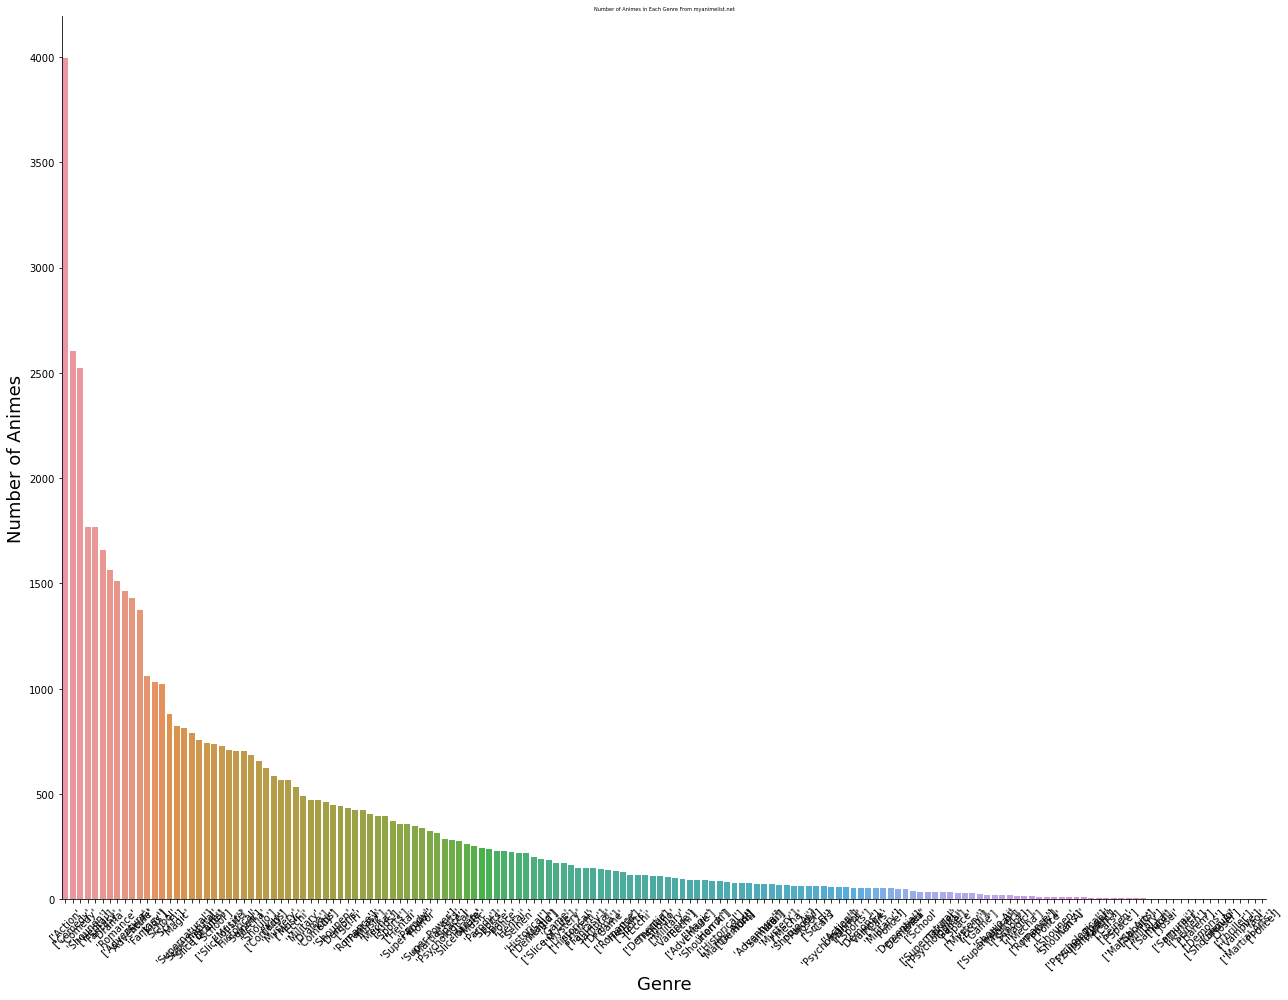

In [14]:
# plot the number of animes per genre
plt.figure(figsize=(18,14))
sns.barplot(x=animes_per_genre.index, y=animes_per_genre.values)
plt.xlabel("Genre", size=18)
plt.ylabel("Number of Animes", size=18)
plt.xticks(rotation=45)
plt.title("Number of Animes in Each Genre From myanimelist.net", size=5)
plt.tight_layout()
sns.despine();

In [15]:
def find_mean_median_popularity(df, string):
    # Create new dataframe that contains only the rows where the genre contains the given string and the ranked are not null
    output_df = df[df["genre"].str.contains(string, na=False) & ~np.isnan(df["popularity"])]["popularity"]
    return output_df.mean(), output_df.median(), output_df.count()

In [16]:
# Create a dictionary to save the information
mmc_dict = {}

In [17]:
top_5_genres = ["Comedy", "Action", "Adventure", "Sci-Fi", "Fantasy"]
for genre in top_5_genres:
    mean, median, count = find_mean_median_popularity(df, genre)
    mmc_dict[genre] = [round(mean, 3), round(median,3), count]

In [18]:
bottom_5_genres = ["Thriller", "Josei", "Shoujo Ai", "Shounen Ai", "Dementia"]
for genre in bottom_5_genres:
    mean, median, count = find_mean_median_popularity(df, genre)
    mmc_dict[genre] = [round(mean, 3), round(median,3), count]

In [19]:
# Convert into a dataframe
mmc_df = pd.DataFrame.from_dict(mmc_dict, orient="index", dtype="float", columns=["Mean", "Median", "Count"])

In [20]:
mmc_df

,Mean,Median,Count
Comedy,6485.347,5702.0,6223.0
Action,5306.197,4471.5,4052.0
Adventure,6790.843,6449.0,3063.0
Sci-Fi,6190.505,5849.0,2753.0
Fantasy,6676.818,6281.0,3292.0
Thriller,3074.603,952.0,151.0
Josei,3465.927,2806.0,110.0
Shoujo Ai,2811.682,2471.0,85.0
Shounen Ai,4227.632,3523.0,106.0
Dementia,10989.194,11944.5,418.0


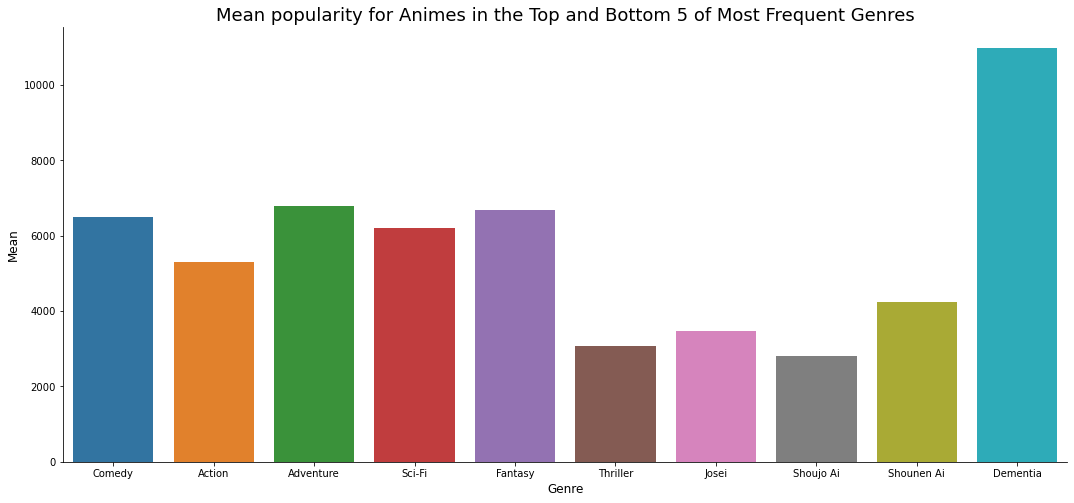

In [21]:
# Plot mean ratings
plt.figure(figsize=(18,8))
sns.barplot(x=mmc_df.index, y=mmc_df["Mean"])
plt.xlabel("Genre", size=12)
plt.ylabel("Mean", size=12)
plt.title("Mean popularity for Animes in the Top and Bottom 5 of Most Frequent Genres", size=18)
sns.despine();

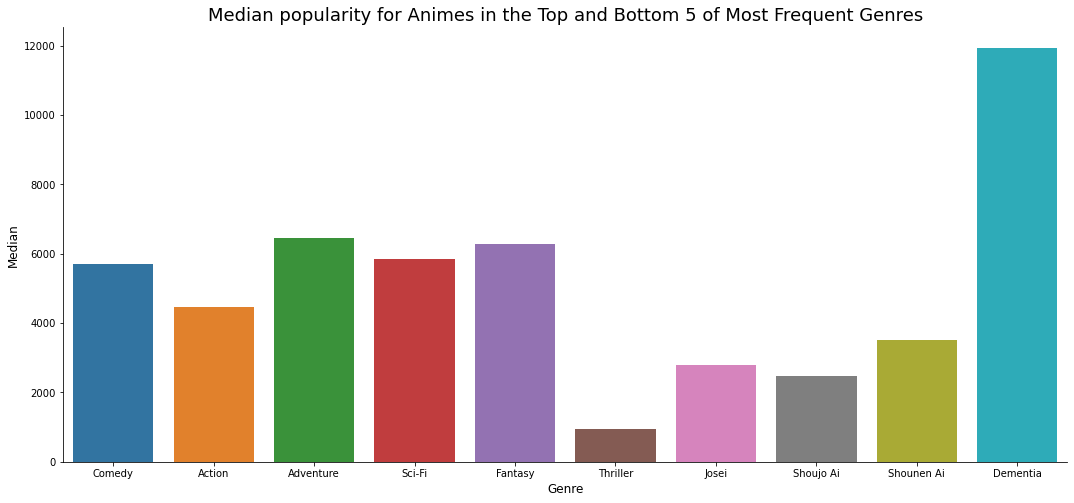

In [22]:
# Plot median ratings
plt.figure(figsize=(18,8))
sns.barplot(x=mmc_df.index, y=mmc_df["Median"])
plt.xlabel("Genre", size=12)
plt.ylabel("Median", size=12)
plt.title("Median popularity for Animes in the Top and Bottom 5 of Most Frequent Genres", size=18)
sns.despine();

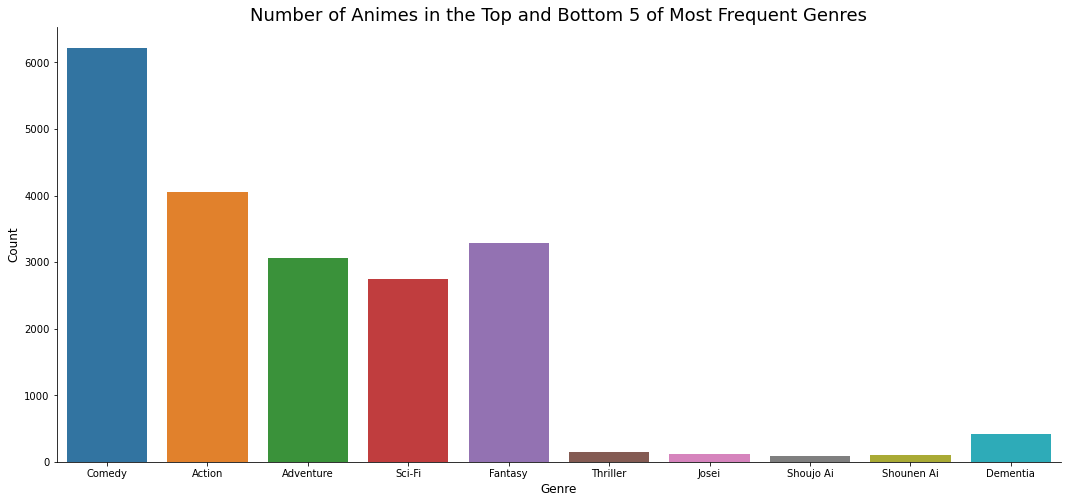

In [23]:
# Plot number of animes in the top
plt.figure(figsize=(18,8))
sns.barplot(x=mmc_df.index, y=mmc_df["Count"])
plt.xlabel("Genre", size=12)
plt.ylabel("Count", size=12)
plt.title("Number of Animes in the Top and Bottom 5 of Most Frequent Genres", size=18)
sns.despine();

In [24]:
# Load popularity dataset
mmc_df.head(10)

,Mean,Median,Count
Comedy,6485.347,5702.0,6223.0
Action,5306.197,4471.5,4052.0
Adventure,6790.843,6449.0,3063.0
Sci-Fi,6190.505,5849.0,2753.0
Fantasy,6676.818,6281.0,3292.0
Thriller,3074.603,952.0,151.0
Josei,3465.927,2806.0,110.0
Shoujo Ai,2811.682,2471.0,85.0
Shounen Ai,4227.632,3523.0,106.0
Dementia,10989.194,11944.5,418.0


In [25]:
# How many rows of data do we have?
print(f"In total, there are {mmc_df.shape[0]} rows of data")

In total, there are 10 rows of data


In [26]:
# How many rows contain a rating value?
print(f"There are {mmc_df[mmc_df.notnull()].shape[0]} rows with the popularity")

There are 10 rows with the popularity


In [27]:
# How many rows have empty ratings?
print(f"This means there are {df[mmc_df.isnull()].shape[0]} rows that do not have ratings")

This means there are 18605 rows that do not have ratings


In [28]:
df[["popularity"]].describe()

,popularity
count,18605.000000
mean,7669.335609
std,4687.455400
min,1.000000
25%,3639.000000
50%,7458.000000
75%,11591.000000
max,16336.000000


In [29]:
# Find total amount of users
total_num_users = df["uid"].nunique()
print(f"Total number of users: {total_num_users}")

Total number of users: 15724


In [30]:
# Number of unique users that have rated an anime before
rated_before_users = df[df["popularity"].notnull()]["uid"].nunique()
print(f"Number of users who have rated before: {rated_before_users}")

Number of users who have rated before: 15724


In [31]:
# Proportion of people who have rated at least one anime
prop_rated = rated_before_users/total_num_users * 100
print(f"The proportion of people who have rated at least one anime on MyAnimeList is {prop_rated:.2f}%")

The proportion of people who have rated at least one anime on MyAnimeList is 100.00%


In [32]:
# First create a new dataframe that contains the user_id and the number of animes rated
rating_freq = df.groupby("uid")[["popularity"]].count()
rating_freq.rename({"popularity": "num_animes_rated"}, axis="columns", inplace=True)
rating_freq

,num_animes_rated
uid,
1,2
5,2
6,2
7,1
8,1
...,...
40814,2
40849,1
40853,2


In [33]:
# Summary statistics
rating_freq.describe()

,num_animes_rated
count,15724.000000
mean,1.183223
std,0.394835
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


In [34]:
#.
rating_freq[rating_freq["num_animes_rated"] >= 2]

,num_animes_rated
uid,
1,2
5,2
6,2
15,2
16,2
...,...
40787,2
40814,2
40853,2


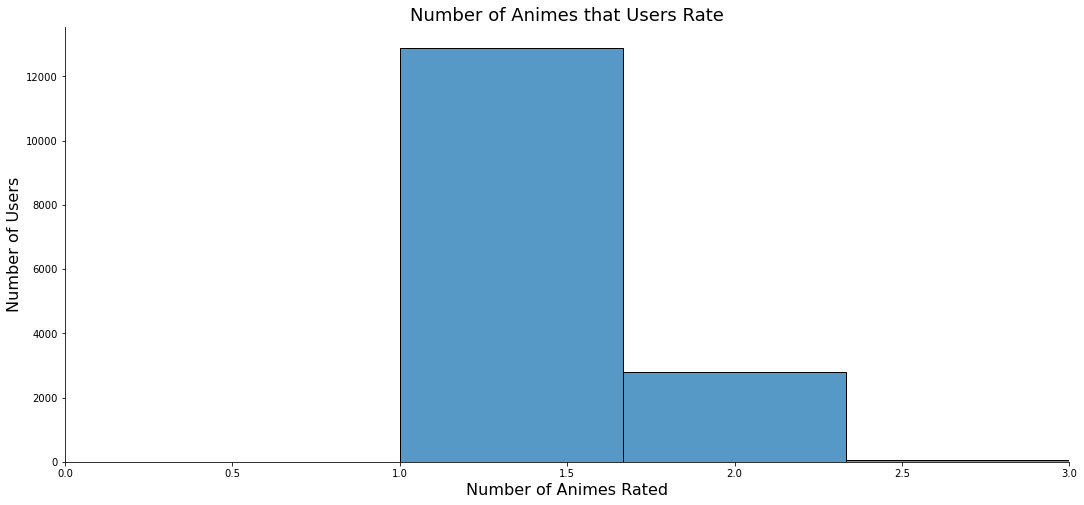

In [35]:
# Plot out the number of animes that a user has rated
plt.figure(figsize=(18,8))
plt.xlim(left=0, right=3)
plt.xlabel("Number of Animes Rated",size=16)
plt.ylabel("Number of Users", size=16)
plt.title("Number of Animes that Users Rate", size=18)
sns.histplot(data=rating_freq.dropna(), x="num_animes_rated", bins=3)
sns.despine();

In [36]:
# Create a dataframe of user_id's and the mean and median ratings they give out
mm_ratings = df.groupby("uid")["popularity"].agg(["mean","median"])
mm_ratings

,mean,median
uid,,
1,39.0,39.0
5,475.0,475.0
6,158.0,158.0
7,1278.0,1278.0
8,3968.0,3968.0
...,...,...
40814,5888.0,5888.0
40849,5223.0,5223.0
40853,10408.0,10408.0


In [37]:
# Summary statistics
mm_ratings.describe()

,mean,median
count,15724.000000,15724.000000
mean,8114.901128,8114.902506
std,4721.694919,4721.693578
min,1.000000,1.000000
25%,4011.000000,4011.000000
50%,8091.500000,8091.500000
75%,12207.250000,12207.250000
max,16336.000000,16336.000000


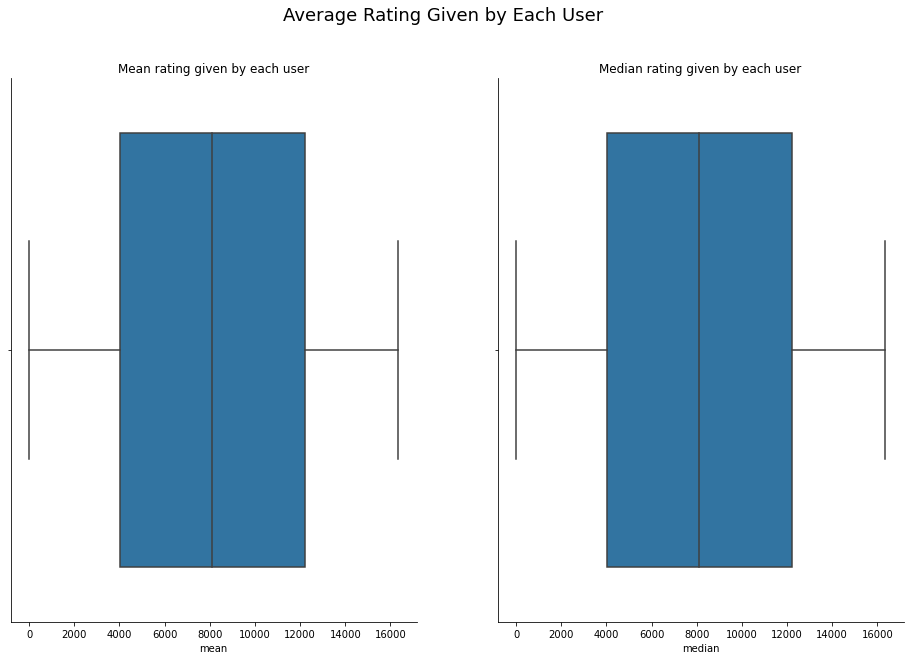

In [38]:
# Create box plots for both averages
fig, ax = plt.subplots(1, 2, figsize=(16,10), sharey=True)
fig.suptitle("Average Rating Given by Each User", size=18)
ax[0].set_title('Mean rating given by each user', size=12)
ax[1].set_title('Median rating given by each user', size=12)
sns.boxplot(ax=ax[0], x="mean", data=mm_ratings)
sns.boxplot(ax=ax[1], x="median", data=mm_ratings)
sns.despine();

In [39]:
df.to_csv("cleaned_data.csv")

In [40]:
df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [41]:
new_df = df

In [42]:
new_df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [43]:
new_df = new_df[new_df["genre"]  != "['']"]

In [44]:
new_df["genre"] = new_df["genre"].str.replace("'", "").str.strip("][").str.split(", ")
type(new_df["genre"][0])

list

In [45]:
new_df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"[Comedy, Sports, Drama, School, Shounen]","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[Drama, Music, Romance, School, Shounen]","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","[Action, Military, Adventure, Comedy, Drama, M...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"[Action, Mystery, Supernatural, Vampire]","Jan 6, 2017",1.0,214621,502,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [46]:
# Using scikit learn's MLB package to one hot encode the genres
from sklearn.preprocessing import MultiLabelBinarizer

# Code from https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list
mlb = MultiLabelBinarizer(sparse_output=True)

new_df = new_df.join(pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(new_df["genre"]),
                index=new_df.index,
                columns=mlb.classes_))

# Drop the origininal genre column
#new_df.drop("genre", axis=1, inplace=True)

In [47]:
new_df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,score,img_url,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"[Comedy, Sports, Drama, School, Shounen]","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,8.82,https://cdn.myanimelist.net/images/anime/9/766...,...,0,0,0,1,0,0,0,0,0,0
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"[Drama, Music, Romance, School, Shounen]","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,8.83,https://cdn.myanimelist.net/images/anime/3/671...,...,0,0,0,0,0,0,0,0,0,0
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"[Sci-Fi, Adventure, Mystery, Drama, Fantasy]","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,8.83,https://cdn.myanimelist.net/images/anime/6/867...,...,0,0,0,0,0,0,0,0,0,0
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","[Action, Military, Adventure, Comedy, Drama, M...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,9.23,https://cdn.myanimelist.net/images/anime/1223/...,...,0,0,0,0,0,0,0,0,0,0
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"[Action, Mystery, Supernatural, Vampire]","Jan 6, 2017",1.0,214621,502,8.83,https://cdn.myanimelist.net/images/anime/3/815...,...,0,0,0,0,0,1,0,1,0,0


In [48]:
new_df.drop("genre", axis=1, inplace=True)

In [49]:
rating_df = new_df

In [50]:
rating_df["uid"].value_counts()

1015     3
4177     3
26       3
37924    3
5751     3
        ..
2285     1
36516    1
1701     1
5799     1
34815    1
Name: uid, Length: 15724, dtype: int64

In [51]:
import random
random.seed(5)
random.choice(rating_df["uid"])

29605

In [52]:
user_df = rating_df[rating_df["uid"]==29605]

In [53]:
# Drop the columns that are not needed
user_df = user_df.drop("uid", axis=1)
user_df = user_df.sort_values("title")

# Reset the indexes
user_df.reset_index(drop=True, inplace=True)

user_df

,title,synopsis,aired,episodes,members,popularity,score,img_url,link,,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,Double Hard,Unbeatable Fist-Fighter Daiki Hayami and Profe...,2013 to ?,26.0,404,11459,6.74,https://cdn.myanimelist.net/images/anime/11/71...,https://myanimelist.net/anime/29605/Double_Hard,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
user_genre_df = df[df["uid"].isin(df["uid"])]
user_genre_df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [55]:
user_genre_df = user_genre_df.sort_values("uid")
user_genre_df.reset_index(drop=True, inplace=True)
user_genre_df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,score,img_url,link
0,1,Cowboy Bebop,"In the year 2071, humanity has colonized sever...","['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","Apr 3, 1998 to Apr 24, 1999",26.0,930311,39,8.81,https://cdn.myanimelist.net/images/anime/4/196...,https://myanimelist.net/anime/1/Cowboy_Bebop
1,1,Cowboy Bebop,"In the year 2071, humanity has colonized sever...","['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","Apr 3, 1998 to Apr 24, 1999",26.0,930311,39,8.81,https://cdn.myanimelist.net/images/anime/4/196...,https://myanimelist.net/anime/1/Cowboy_Bebop
2,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']","Sep 1, 2001",1.0,223199,475,8.40,https://cdn.myanimelist.net/images/anime/1439/...,https://myanimelist.net/anime/5/Cowboy_Bebop__...
3,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']","Sep 1, 2001",1.0,223199,475,8.40,https://cdn.myanimelist.net/images/anime/1439/...,https://myanimelist.net/anime/5/Cowboy_Bebop__...
4,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...","['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Apr 1, 1998 to Sep 30, 1998",26.0,460146,158,8.28,https://cdn.myanimelist.net/images/anime/7/203...,https://myanimelist.net/anime/6/Trigun


In [56]:
user_genre_matrix = user_genre_df.drop(["uid", "img_url","link"], axis=1)
user_genre_matrix.head()

,title,synopsis,genre,aired,episodes,members,popularity,score
0,Cowboy Bebop,"In the year 2071, humanity has colonized sever...","['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","Apr 3, 1998 to Apr 24, 1999",26.0,930311,39,8.81
1,Cowboy Bebop,"In the year 2071, humanity has colonized sever...","['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","Apr 3, 1998 to Apr 24, 1999",26.0,930311,39,8.81
2,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']","Sep 1, 2001",1.0,223199,475,8.40
3,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']","Sep 1, 2001",1.0,223199,475,8.40
4,Trigun,"Vash the Stampede is the man with a $$60,000,0...","['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Apr 1, 1998 to Sep 30, 1998",26.0,460146,158,8.28


In [57]:
user_df["popularity"]

0    11459
Name: popularity, dtype: int64

In [58]:
weights = user_genre_matrix.transpose() #.dot(user_df["popularity"])

weights

,0,1,2,3,4,5,6,7,8,9,...,18595,18596,18597,18598,18599,18600,18601,18602,18603,18604
title,Cowboy Bebop,Cowboy Bebop,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: Tengoku no Tobira,Trigun,Trigun,Witch Hunter Robin,Bouken Ou Beet,Eyeshield 21,Eyeshield 21,...,Ore wo Suki nano wa Omae dake ka yo: Ore wa Te...,Seitokai Yakuindomo Movie 2,Seitokai Yakuindomo Movie 2,Shinchou Yuusha: Kono Yuusha ga Ore Tueee Kuse...,Stand By Me Doraemon 2,Stand By Me Doraemon 2,Psycho-Pass 3 Movie: First Inspector,Psycho-Pass 3 Movie: First Inspector,Ore wo Suki nano wa Omae dake ka yo: Oretachi ...,Ore wo Suki nano wa Omae dake ka yo: Oretachi ...
synopsis,"In the year 2071, humanity has colonized sever...","In the year 2071, humanity has colonized sever...","Another day, another bounty—such is the life o...","Another day, another bounty—such is the life o...","Vash the Stampede is the man with a $$60,000,0...","Vash the Stampede is the man with a $$60,000,0...",Witches are individuals with special powers li...,It is the dark century and the people are suff...,Sena is like any other shy kid starting high s...,Sena is like any other shy kid starting high s...,...,Recap of the first nine episodes of Ore wo Su...,No synopsis available,No synopsis available,Recap of first nine episodes of Shinchou Yuus...,Second movie of Stand By Me Doraemon .,Second movie of Stand By Me Doraemon .,Compilation movie of Psycho-Pass 3 .,Compilation movie of Psycho-Pass 3 .,The original video anime episode will serve as...,The original video anime episode will serve as...
genre,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']","['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","['Action', 'Magic', 'Police', 'Supernatural', ...","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...","['Action', 'Sports', 'Comedy', 'Shounen']","['Action', 'Sports', 'Comedy', 'Shounen']",...,"['Comedy', 'Romance', 'School']","['Comedy', 'School', 'Shounen', 'Slice of Life']","['Comedy', 'School', 'Shounen', 'Slice of Life']","['Action', 'Adventure', 'Comedy', 'Fantasy']","['Sci-Fi', 'Comedy', 'Kids', 'Seinen']","['Sci-Fi', 'Comedy', 'Kids', 'Seinen']","['Action', 'Sci-Fi', 'Police', 'Psychological']","['Action', 'Sci-Fi', 'Police', 'Psychological']","['Comedy', 'Romance', 'School']","['Comedy', 'Romance', 'School']"
aired,"Apr 3, 1998 to Apr 24, 1999","Apr 3, 1998 to Apr 24, 1999","Sep 1, 2001","Sep 1, 2001","Apr 1, 1998 to Sep 30, 1998","Apr 1, 1998 to Sep 30, 1998","Jul 2, 2002 to Dec 24, 2002","Sep 30, 2004 to Sep 29, 2005","Apr 6, 2005 to Mar 19, 2008","Apr 6, 2005 to Mar 19, 2008",...,"Dec 5, 2019","Jul 10, 2020","Jul 10, 2020","Dec 11, 2019","Aug 7, 2020","Aug 7, 2020",2020,2020,2020,2020
episodes,26.0,26.0,1.0,1.0,26.0,26.0,26.0,52.0,145.0,145.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
members,930311,930311,223199,223199,460146,460146,85182,12319,126760,126760,...,11006,4772,4772,6393,671,671,5953,6050,7976,7976
popularity,39,39,475,475,158,158,1278,3968,888,888,...,4177,5888,5888,5223,10408,10408,16333,16333,16332,16332
score,8.81,8.81,8.4,8.4,8.28,8.28,7.32,7.02,8.02,8.02,...,6.4,6.436107,6.436107,5.7,6.436107,6.436107,6.436107,6.436107,6.436107,6.436107


In [59]:
# Set the index of the dataframe to the anime_id
recommendation_table = df.set_index("uid")
# Drop the name column
recommendation_table.drop(["img_url", "link"], axis=1, inplace=True)
recommendation_table.head()

,title,synopsis,genre,aired,episodes,members,popularity,score
uid,,,,,,,,
28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,8.82
23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,8.83
34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,8.83
5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,9.23
31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,8.83


In [64]:
recommendation_series = (recommendation_table * weights).sum(axis=1) / weights.sum()
recommendation_series.head()

1   NaN
1   NaN
5   NaN
5   NaN
6   NaN
dtype: float64

In [62]:
recommendations = recommendation_series.sort_values(ascending=False)
recommendations.head(10)

1    NaN
1    NaN
5    NaN
5    NaN
6    NaN
6    NaN
7    NaN
8    NaN
15   NaN
15   NaN
dtype: float64

In [66]:
# Find the top 10 animes in the recommendations in the anime dataset and put it in a new dataframe
recommendations_df = df.loc[df["uid"].isin(recommendations.head(10).keys())]
# Set the index of the dataframe to the anime ids
recommendations_df.set_index("uid", inplace=True)
# Use loc and the anime ids of the top 10 anime recommendations to preserve the order and output that to the user
recommendations_df.loc[recommendations.head(10).keys()][["title"]]

,title
uid,
1,Cowboy Bebop
1,Cowboy Bebop
1,Cowboy Bebop
1,Cowboy Bebop
5,Cowboy Bebop: Tengoku no Tobira
5,Cowboy Bebop: Tengoku no Tobira
5,Cowboy Bebop: Tengoku no Tobira
5,Cowboy Bebop: Tengoku no Tobira
6,Trigun
